<a href="https://www.kaggle.com/code/georgeomongos/clickbait-classification?scriptVersionId=163507125" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <span style="color:#0047AB"> **Binary Classification** </span>

## <span style="color:#0047AB"> **Table of Contents** </span>

* [**Introduction**](#introduction)
    * [About the Dataset](#dataset)
* [**Data Import**](#import)
* [**Exploratory Data Analysis**](#eda)
    * [Checking for data structure](#structure)
    * [Checking for Null/Missing values](#null)
    * [Data Visualization](#visual)
    * [Initial Findings](#findings)
* [**Data Preparation**](#prepare)
    * [Natural Language Processing](#nlp)
    * [NLP Tools](#nltk)
    * [Removing stop words with NLTK in Python](#stopwords)
    * [Data Splitting](#split)
    * [Text Vectorization](#vector)
* [**Model Training**](#train)
    * [Commonly Used ML Algorithm for classification](#algo)
* [**Model Evaluation**](#eval)
    * [Compare the model performances](#compare)
    * [Confusion Matrix](#matrix)
    * [Confusion Matrix Visuals](#matrix_visual)
    * [Precision](#precision)
    * [Recall or Sensitivity](#recall)
    * [F1: Score](#f1)  
    * [Area Under Curve - Receiver operating characteristic (AUCROC)](#auc)
    * [Conclusion](#conclusion)
* [**Model Testing**](#test)

## <span style="color:#0047AB"> **Introduction** </span> <a id="introduction"></a>
The notebook is a simple **`Binary Classification`** machine learning model creation. The dataset I will be using is the **`Clickbait dataset`**, which attempts to classify news headlines as clickbait or non-clickbait.

### <span style="color:#0047AB"> **About the Dataset** </span> <a id="dataset"></a>

The [Clickbait Dataset](https://www.kaggle.com/datasets/amananandrai/clickbait-dataset) from Aman Anand is a dataset that collects data from various news sites.

The clickbait headlines are collected from sites such as `BuzzFeed`, `Upworthy`, `ViralNova`, `Thatscoop`, `Scoopwhoop` and `ViralStories`.
The relevant or non-clickbait headlines are collected from many trustworthy news sites such as `WikiNews`, `New York Times`, `The Guardian`, and `The Hindu`.

It has two columns first one contains headlines and the second one has numerical labels of clickbait in which 1 represents that it is clickbait and 0 represents that it is non-clickbait headline. The dataset contains total 32000 rows of which 50% are clickbait and other 50% are non-clickbait.

| Headline | Clickbait |
| --- | --- |
| contains headlines from news sites in text format | contains numeric labels of which 1 represents it is clickbait and 0 represents non-clickbait |

## <span style="color:#0047AB"> **Data Import** </span> <a id="import"></a>

In [1]:
import pandas as pd
df=pd.read_csv('/kaggle/input/clickbait-dataset/clickbait_data.csv')
df

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


## <span style="color:#0047AB"> **Exploratory Data Analysis** </span> <a id="eda"></a>  
Exploratory data analysis (EDA) is an important step in the machine learning process. EDA helps us understand the data better and identify patterns and trends that may be hidden within it.EDA can also be used to identify potential data issues. It is a good practice to understand the data first and try to gather as many insights from it.

### <span style="color:#0047AB"> **Checking for data structure** </span> <a id="structure"></a>  

In [2]:
#DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headline   32000 non-null  object
 1   clickbait  32000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.1+ KB


### <span style="color:#0047AB"> **Checking for Null/Missing values** </span> <a id="null"></a>  

In [3]:
#checking for missing values
df.isnull().sum()

headline     0
clickbait    0
dtype: int64

### <span style="color:#0047AB"> **Data Visualization** </span> <a id="visual"></a>  

<AxesSubplot:xlabel='clickbait', ylabel='count'>

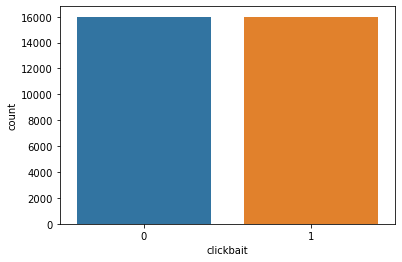

In [4]:
import seaborn as sns
sns.countplot(x=df.clickbait)

In [5]:
# Python function to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


def generate_wordCloud(column):
    comment_words = ''
    stopwords = list(STOPWORDS) + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
# iterate through the headline column
    for val in column:
    # typecaste each val to string
        val = str(val)
    # split the value
        tokens = val.split()
    # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          stopwords = stopwords,
                          min_font_size = 10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [6]:
#separating the headline for clickbait and non clickbait
clickbait_headline = df.loc[df["clickbait"] == 1]
not_clickbait_headline = df.loc[df["clickbait"] == 0]

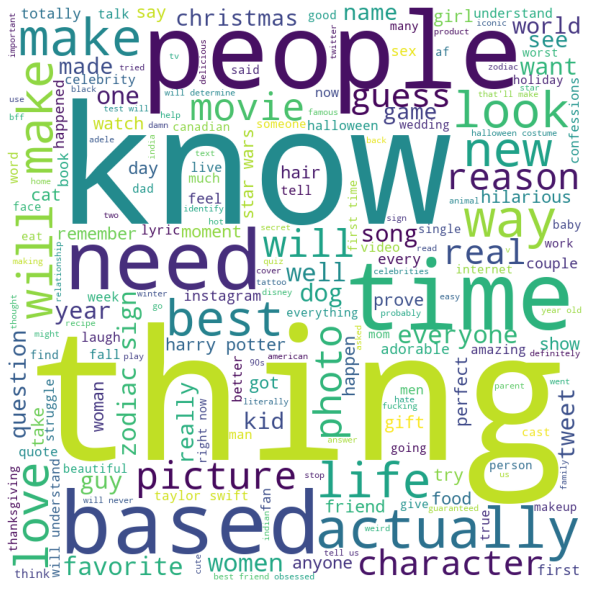

In [7]:
#Generate word cloud with clickbait headline
generate_wordCloud(clickbait_headline['headline'])

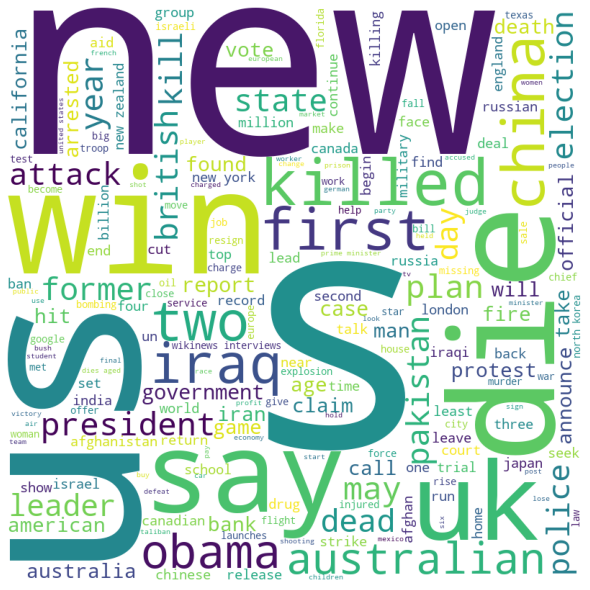

In [8]:
#Generate word cloud with non clickbait headline
generate_wordCloud(not_clickbait_headline['headline'])

### <span style="color:#0047AB"> **Initial Findings** </span> <a id="findings"></a>
- File has 32000 rows with 2 columns
- No missing/null values in all the columns
- We have balanced dataset, equal number of output(clickbait column) to the input(headline column)
- Count of clickbait (1) to non clickbait (0) is both 16000
- Word cloud for non clickbait headlines are mostly of "news" with political names and of countries while clickbait consists mostly of celebrities and fictional characters with adjective words

## <span style="color:#0047AB"> **Data Preparation** </span> <a id="prepare"></a> 
Data preparation is the process by which the data is subjected to various checks and scrutiny in order to remedy issues of missing values, spelling errors, normalizing/standardizing values such that they are comparable and compatible with the algorithm that we will be using.

### <span style="color:#0047AB"> **Natural Language Processing** </span> <a id="nlp"></a>
We will use natural language processing because we are using a text dataset. Natural language processing (NLP) refers to the branch of computer science—and more specifically, the branch of artificial intelligence or AI—concerned with giving computers the ability to understand text and spoken words in much the same way human beings can.

### <span style="color:#0047AB"> **NLP Tools** </span> <a id="nltk"></a>
The Python programing language provides a wide range of tools and libraries for attacking specific NLP tasks. Many of these are found in the Natural Language Toolkit, or NLTK, an open source collection of libraries, programs, and education resources for building NLP programs.The NLTK includes libraries for tasks, such as sentence parsing, word segmentation, stemming and lemmatization (methods of trimming words down to their roots), and tokenization (for breaking phrases, sentences, paragraphs and passages into tokens that help the computer better understand the text). It also includes libraries for implementing capabilities such as semantic reasoning, the ability to reach logical conclusions based on facts extracted from text.

### <span style="color:#0047AB"> **Removing stop words with NLTK in Python** </span> <a id="stopwords"></a>
A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. 
We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.

In [9]:
#Importing NLTK library and downloading stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# Function creation for data cleanup, data manipulation and removal of stopwords
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

def RemoveSpecialCharacters(sentence):
    return re.sub('[^a-zA-Z]+',' ',sentence)

def ConvertToLowerCase(sentence):
    return sentence.lower()

def ConvertAndRemove(sentence):
    sentence = str(sentence)
    sentence = RemoveSpecialCharacters(sentence)
    # convert to lower case
    sentence = ConvertToLowerCase(sentence)
    return sentence

def CleanText(sentence):
    sentence = str(sentence)

    # Remove stopwords
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Remove punctuation
    nopunc = [char for char in sentence if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    sentence = ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])
    sentence = ConvertAndRemove(sentence)
    return sentence

In [11]:
#Function testing
print(CleanText('I am going to the Ne\'therla\'nds and I\'m going to win an Olympic medal.'))

going netherlands going win olympic medal


In [12]:
#Removing Special Characters and transforming text to lower case in the headline column
df['Text_cleaning'] = df.headline.apply(CleanText)
df.head()

,headline,clickbait,Text_cleaning
0,Should I Get Bings,1,get bings
1,Which TV Female Friend Group Do You Belong In,1,tv female friend group belong
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,new star wars force awakens trailer give chills
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,vine new york celebrity big brother fucking pe...
4,A Couple Did A Stunning Photo Shoot With Their...,1,couple stunning photo shoot baby learning inop...


### <span style="color:#0047AB"> **Data Splitting** </span> <a id="split"></a>
In the development of machine learning models, it is desirable that the trained model perform well on new, unseen data.
In order to simulate the new, unseen data, the available data is subjected to data splitting whereby it is split to 2 portions. 
First portion is the training set usually 80% of the data. The training set is the set your model learns from. A testing set is used to check the accuracy of your model after training.

In [13]:
#Define the features (X) and label (Y)
X = df.Text_cleaning
y = df.clickbait

In [14]:
#Checking the length of our Features and label data before splitting
print('the length of our original training data is:',len(X))
print('the length of our original testing data is:',len(y))

the length of our original training data is: 32000
the length of our original testing data is: 32000


In [15]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#checking the new length of training and testing data

print('the length of X_train is now:',len(X_train))
print('the length of X_test is now:',len(X_test))
print('the length of y_train is now:',len(y_train))
print('the length of y_test is now:',len(y_test))

the length of X_train is now: 25600
the length of X_test is now: 6400
the length of y_train is now: 25600
the length of y_test is now: 6400


### <span style="color:#0047AB"> **Text Vectorization** </span> <a id="vector"></a>
Processing natural language text and extract useful information from the given word, a sentence using machine learning and deep learning techniques requires the string/text needs to be converted into a set of real numbers (a vector) — Word Embeddings.

Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions, word similarities/semantics.

The process of converting words into numbers are called Vectorization.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [18]:
X_train_dtm

<25600x21436 sparse matrix of type '<class 'numpy.int64'>'
	with 152145 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_clean = tfidf_transformer.fit_transform(X_train_dtm)

In [20]:
print(X_train_clean)

  (0, 20691)	0.27874184201961916
  (0, 17768)	0.3345529176182634
  (0, 15408)	0.443280710732536
  (0, 15002)	0.37952311039285885
  (0, 13192)	0.443280710732536
  (0, 12018)	0.32318125012329857
  (0, 5712)	0.30945596770049805
  (0, 3477)	0.2704345505044664
  (1, 19768)	0.4943954061330551
  (1, 19352)	0.6624730736498667
  (1, 8360)	0.5627633686403459
  (2, 19358)	0.398093544057493
  (2, 14980)	0.3044588790043617
  (2, 14484)	0.25078631831387677
  (2, 13284)	0.33813632294469903
  (2, 12879)	0.18494510864592098
  (2, 12716)	0.45227553340304516
  (2, 9559)	0.2966918040963563
  (2, 7673)	0.398093544057493
  (2, 7100)	0.2938265186498573
  (3, 12037)	0.31565021664326437
  (3, 10624)	0.41919574997204595
  (3, 10118)	0.402951847353606
  (3, 8075)	0.2854420765479582
  (3, 7531)	0.3409694430081179
  :	:
  (25596, 11813)	0.5860933147732315
  (25596, 9071)	0.3572209408805257
  (25596, 7075)	0.29993546844497326
  (25596, 6255)	0.43653766312518216
  (25597, 15954)	0.36744333021546094
  (25597, 15204)	

## <span style="color:#0047AB"> **Model Training** </span> <a id="train"></a>
During this step, ML algorithm is selected, and trained. The common approach to build a good model is try to different algorithms and compare their performance. It is important to have an understanding to the different available algorithms available that will fit to our problem.

### <span style="color:#0047AB"> **Commonly Used ML Algorithm for classification** </span> <a id="algo"></a>
1. Logistic Regression
2. Naïve Bayes
3. Stochastic Gradient Descent
4. K-Nearest Neighbours
5. Decision Tree
6. Random Forest
7. Support Vector Machine

In [21]:
#Import ML algorithm from Scikit learn library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [22]:
Classifiers = [
{
   'label': 'Logistic Regression',
   'model': LogisticRegression(C=0.00000001,solver='liblinear',max_iter=200, multi_class='auto'),
},
{
    'label': 'SGD Classifier',
    'model': SGDClassifier(loss='log', warm_start=True, max_iter=1000, l1_ratio=0.03, penalty='l2', alpha=1e-4, fit_intercept=False),
},
{
    'label': 'KNeighbours',
    'model': KNeighborsClassifier(n_neighbors=15),
},
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(max_depth=10,random_state=101,max_features= None,min_samples_leaf=15),
},
{
   'label': 'Random Forest',
   'model': RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1,random_state=101,max_features= None,min_samples_leaf = 30),
}
]

In [23]:
Accuracy=[]
Model=[]
prediction = []
for c in Classifiers:
    try:
        classifier = c['model']
        fit = classifier.fit(X_train_clean, y_train)
        pred = fit.predict(X_test_dtm)
    except Exception:
        fit = classifier.fit(X_train_clean, y_train)
        pred = fit.predict(X_test_dtm)
    prediction.append(pred)
    accuracy = accuracy_score(pred,y_test)
    Accuracy.append(accuracy)
    Model.append(c['label'])
    print('Accuracy of '+c['label']+' is '+str(accuracy))

Accuracy of Logistic Regression is 0.68390625
Accuracy of SGD Classifier is 0.9425
Accuracy of KNeighbours is 0.8678125
Accuracy of Decision Tree is 0.6415625
Accuracy of Random Forest is 0.8153125


## <span style="color:#0047AB"> **Model Evaluation** </span> <a id="eval"></a>
Different quantitative and/or qualitative evaluation metrics should be used to prove the efficacy of the trained model. We will be evaluating results of the 5 trained models.

Commonly used metrics are
- accuracy
- confusion matrix
- precision
- recall
- F1 score
- Area under Curve – Receiver operation characteristics (AUCROC)


### <span style="color:#0047AB"> **Compare the model performances** </span> <a id="compare"></a>

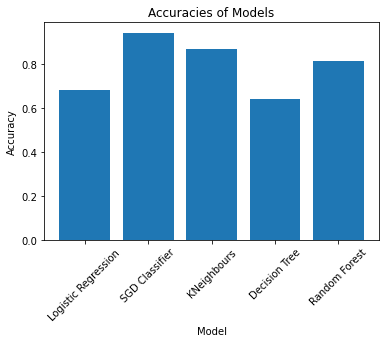

In [24]:
import matplotlib.pyplot as plt
Index = [1,2,3,4,5]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show()

###   <span style="color:#0047AB"> **Confusion Matrix** </span> <a id="matrix"></a>
A table showing correct predictions and types of incorrect predictions.

In [25]:
from sklearn.metrics import confusion_matrix

# test = confusion_matrix(y_test,prediction[1]).ravel()
# test
for p in prediction:
    true_negative, false_positive, false_negative , true_positive = confusion_matrix(y_test,p).ravel()
    print(true_negative, false_positive, false_negative , true_positive)

3116 11 2012 1261
2944 183 185 3088
2331 796 50 3223
3082 45 2249 1024
2821 306 876 2397


###   <span style="color:#0047AB"> **Confusion Matrix Visuals** </span> <a id="matrix_visual"></a>

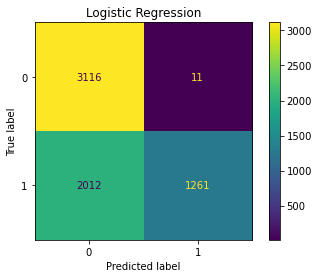

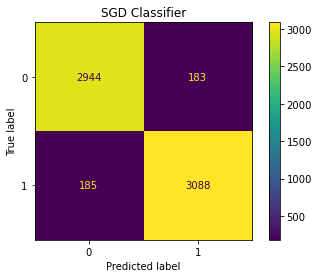

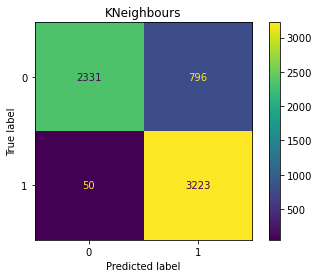

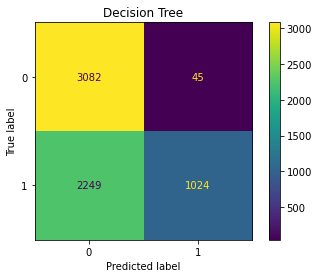

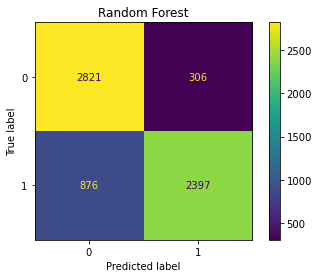

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

for i,p in enumerate(prediction):
    cm = confusion_matrix(y_test, p, labels=fit.classes_)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(values_format='g')
    disp.ax_.set_title(Classifiers[i]['label'])

plt.show()

###   <span style="color:#0047AB"> **Precision** </span> <a id="precision"></a>
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.

In [27]:
from sklearn.metrics import precision_score

for i,p in enumerate(prediction):
    prec_score = precision_score(y_test, p, average='weighted')
    print(f"The precision score of {Classifiers[i]['label']} is {prec_score}")


The precision score of Logistic Regression is 0.8038749216979292
The precision score of SGD Classifier is 0.9425009931647016
The precision score of KNeighbours is 0.8884510141362861
The precision score of Decision Tree is 0.77234808479192
The precision score of Random Forest is 0.8263332122297018


###   <span style="color:#0047AB"> **Recall or Sensitivity** </span> <a id="recall"></a>
The ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.

In [28]:
from sklearn.metrics import recall_score

for i,p in enumerate(prediction):
    recall = recall_score(y_test, p, average='weighted')
    print(f"The recall score of {Classifiers[i]['label']} is {recall}")

The recall score of Logistic Regression is 0.68390625
The recall score of SGD Classifier is 0.9425
The recall score of KNeighbours is 0.8678125
The recall score of Decision Tree is 0.6415625
The recall score of Random Forest is 0.8153125


###   <span style="color:#0047AB"> **F1: Score** </span> <a id="f1"></a>
The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

In [29]:
from sklearn.metrics import f1_score

for i,p in enumerate(prediction):
    f1 = f1_score(y_test, p, average='weighted')
    print(f"The F1 score of {Classifiers[i]['label']} is {f1}")

The F1 score of Logistic Regression is 0.6526342292050222
The F1 score of SGD Classifier is 0.9425004045016538
The F1 score of KNeighbours is 0.8656224527775089
The F1 score of Decision Tree is 0.5972921556322573
The F1 score of Random Forest is 0.8142179676354891


###   <span style="color:#0047AB"> **Area Under Curve - Receiver operating characteristic (AUCROC)** </span> <a id="auc"></a>
Represents the likelihood of your model distinguishing observations from two classes. In other words, if you randomly select one observation from each class, what’s the probability that your model will be able to “rank” them correctly?

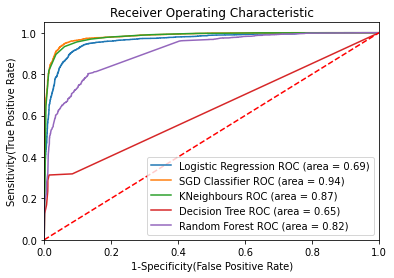

In [30]:

from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Below for loop iterates through your models list
for m in Classifiers:
    model = m['model'] # select the model
    model.fit(X_train_clean, y_train) # train the model
    y_pred=model.predict(X_test_dtm) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_dtm)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test_dtm))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

###   <span style="color:#0047AB"> **Conclusion** </span> <a id="conclusion"></a>
It is clear from comparing the 5 trained models across the various evaluation metrics that **SGD Classifier** is the best model available.
-  SGD Classifier has the highest accuracy of 94.23%
- SGD has the highest number of true negative/positive and least number of false negative/positive in confusion matrix
- SGD has the highest precision of 94.23%
- SGD has the highest recall or sensitivity of 94.23%
- SGD has the highest F1 score of 94.23%
- SGD has the highest ROC of 94%

## <span style="color:#0047AB"> **Model Testing** </span> <a id="test"></a>
In this testing phase, we will be using **pipeline**, a set of tasks happening in sequence, where the output of a task becomes the input of the next one, until it outputs the final product at the end. 
The sequence of our pipeline will be same from what we have done during the training phase.
- converting the clean text columng to numbers using **CountVectorizer** and then **TfidTransformer**
- model training with the selected classifier

We will be using the SGD Classifier model that we have trained in testing since it has the highest evaluation metrics

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', Classifiers[1]['model'])])
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model',
                 SGDClassifier(fit_intercept=False, l1_ratio=0.03, loss='log',
                               warm_start=True))])

In [32]:
y_pred = pipe.predict(X_test)

In [33]:
#sample clickbait from the dataset
test_sample1=['The New Star Wars: The Force Awakens Trailer Is Here To Give You Chills'] 

#sample not a clickbait from the dataset
test_sample2 = ['Scientology defector arrested after attempting to leave organization']  

#made up sample, expected to be clickbait
test_sample3 =['Hurry grab our promo now!']

prediction = pipe.predict(test_sample3)
if prediction == 0:
  result = 'Not Clickbait'
else:
    result = 'Clickbait'
print(f'The headline is {result}')

The headline is Clickbait
